In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


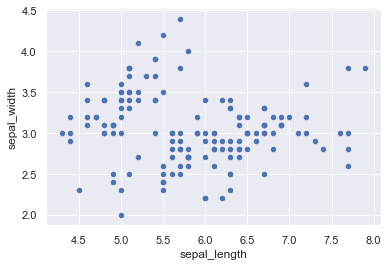

In [4]:
iris.plot(kind='scatter', x="sepal_length", y="sepal_width")

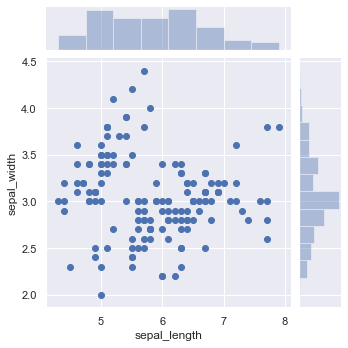

In [5]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="scatter", size=5)
plt.show()

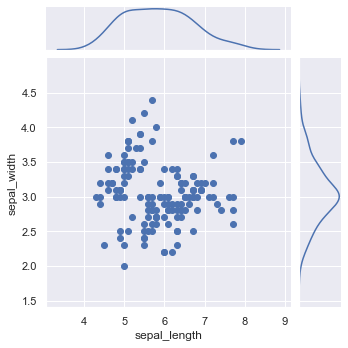

In [6]:
g = sns.JointGrid(x="sepal_length", y="sepal_width", data=iris, size=5)
g = g.plot(plt.scatter, sns.kdeplot)

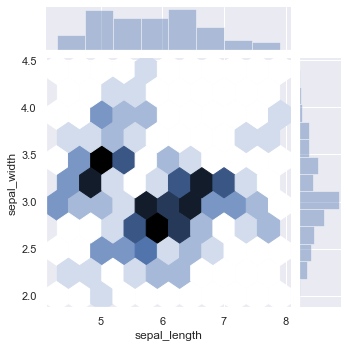

In [7]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hexbin", size=5)
plt.show()

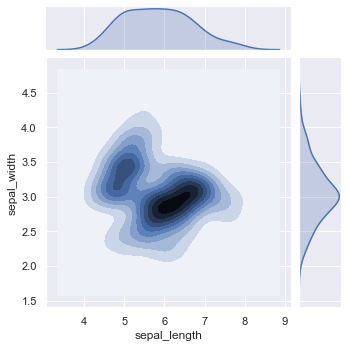

In [8]:
g = sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", size=5)

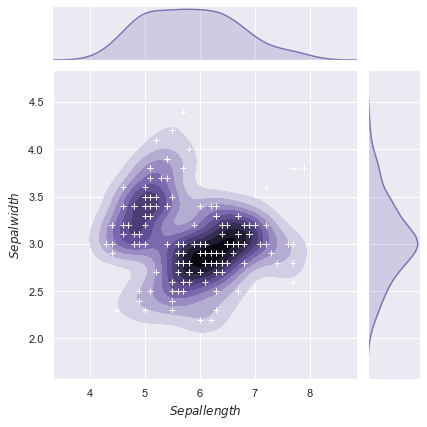

In [9]:
g = sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Sepal length$", "$Sepal width$");

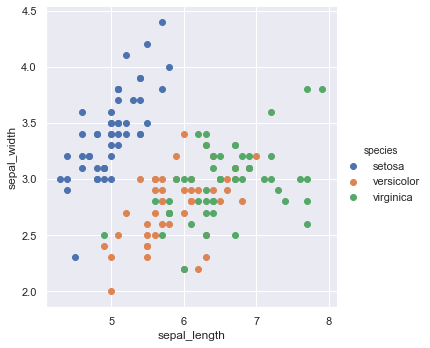

In [10]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
g = sns.FacetGrid(iris, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

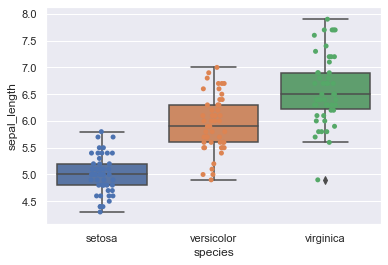

In [11]:
# We can look at an individual feature in Seaborn through a boxplot

sns.boxplot(x="species", y="sepal_length", data=iris)
g = sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True, edgecolor="gray")

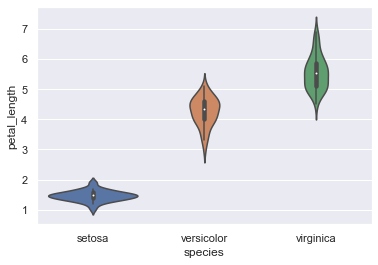

In [12]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

g =sns.violinplot(x="species", y="petal_length", data=iris, size=6)

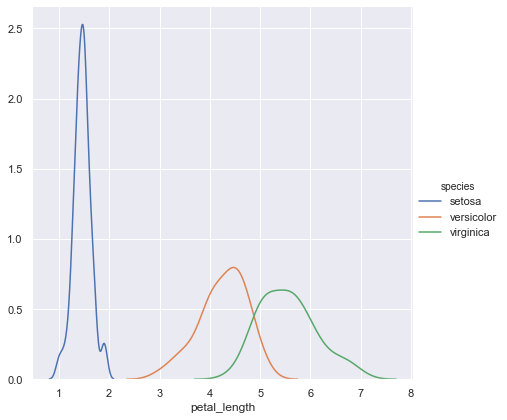

In [13]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
g = sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

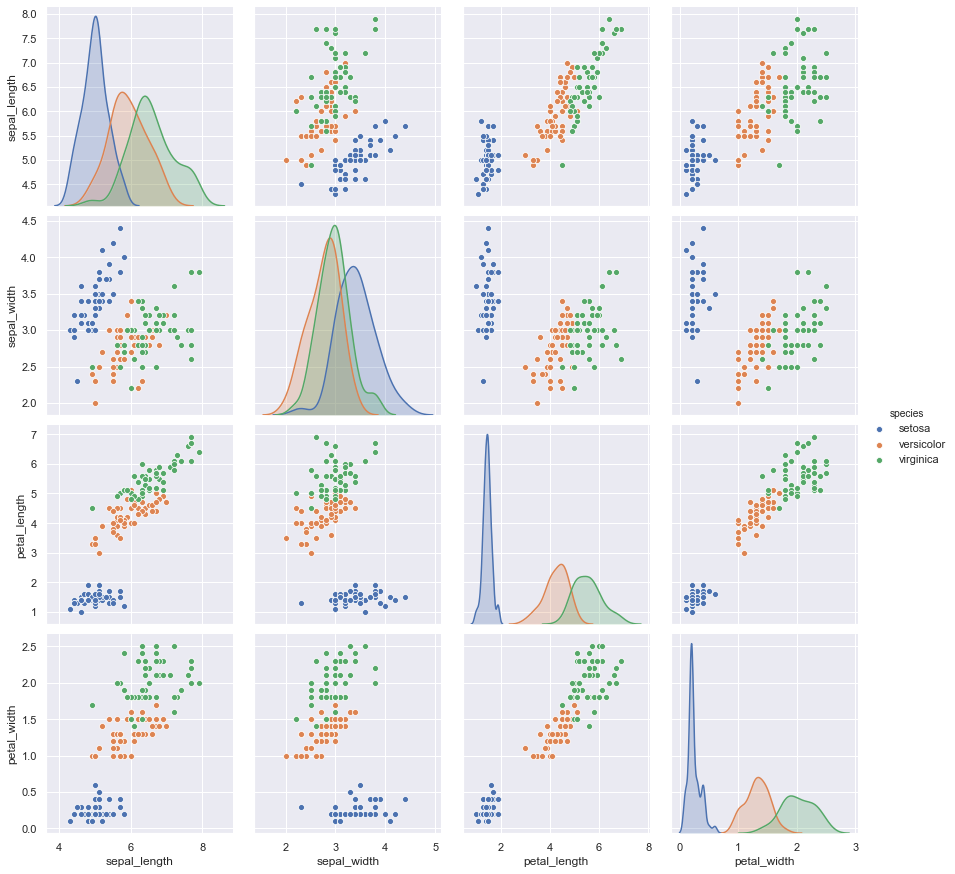

In [14]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
g = sns.pairplot(iris, hue="species", size=3)


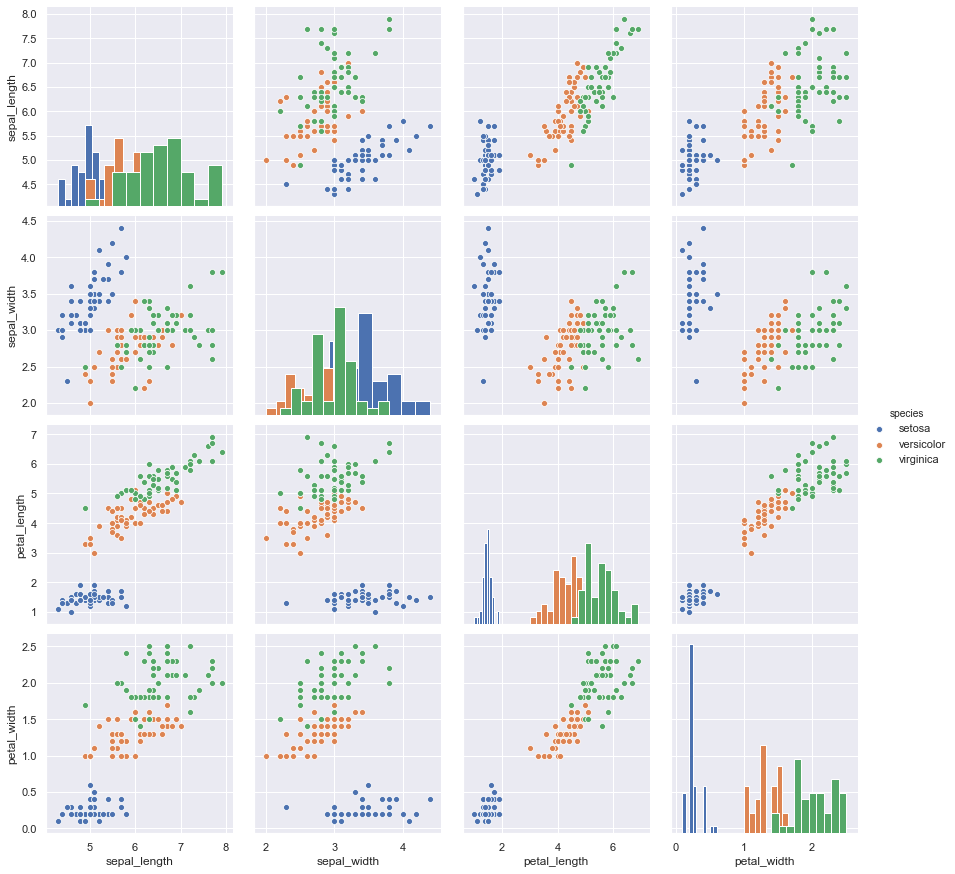

In [15]:
g = sns.pairplot(iris, hue="species", size=3, diag_kind="hist")

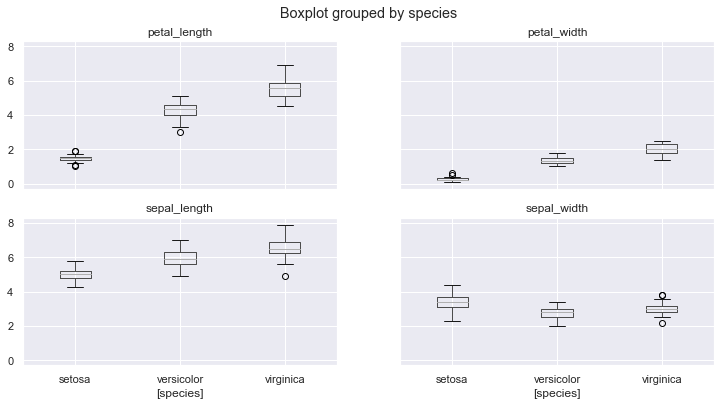

In [16]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
g = iris.boxplot(by="species", figsize=(12, 6))

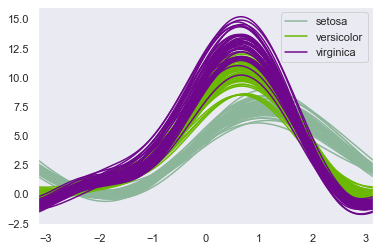

In [17]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

from pandas.plotting import andrews_curves
p = andrews_curves(iris, "species")

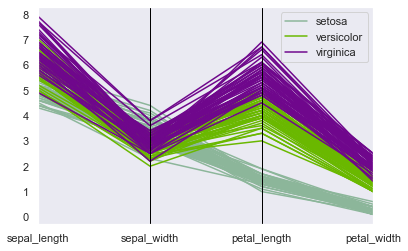

In [18]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

from pandas.plotting import parallel_coordinates
p = parallel_coordinates(iris, "species")

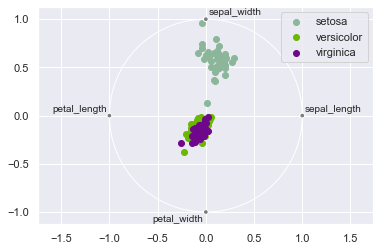

In [19]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted by the relative value for that feature

from pandas.plotting import radviz
p = radviz(iris, "species")